# Importing TensorFlow

In [1]:
!nvidia-smi

Sun Jun 16 23:40:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   42C    P4             10W /  100W |      63MiB /   8188MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-06-16 23:40:01.333380: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 23:40:01.356807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 23:40:01.356829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 23:40:01.357469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 23:40:01.362102: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We have 60k training, 10k testing images in shape of (28,28)

In [6]:
x_train_tensor = tf.constant(x_train, dtype = tf.float32)
x_test_tensor = tf.constant(x_test, dtype = tf.float32)
y_train_tensor = tf.constant(y_train)
y_test_tensor = tf.constant(y_test)

2024-06-16 23:40:03.087390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6021 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
x_train_tensor_rescaled = x_train_tensor / 255.
x_test_tensor_rescaled = x_test_tensor / 255.

Label: 0


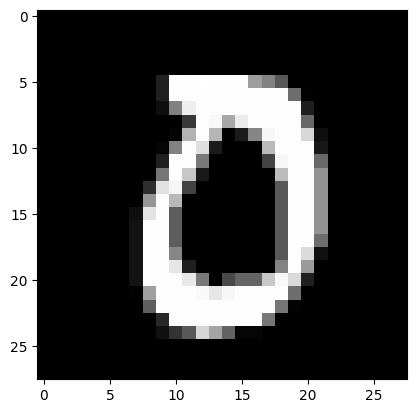

In [8]:
a = 28
print(f"Label: {y_test_tensor[a]}")
plt.imshow(x_test_tensor_rescaled[a], cmap="grey")

In [9]:
tf.unique(y_train_tensor)

Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 2, ..., 0, 7, 9], dtype=int32)>)

We have 10 unique labels

# Creating the model

In [10]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
dnn_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ["accuracy"]
)

In [12]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_accuracy")>0.98:
            print("Reached %98 accuracy, stopping training")
            self.model.stop_training = True

callback = MyCallback()

# Training and evaluating

In [13]:
history = dnn_model.fit(
    x = x_train_tensor_rescaled,
    y = y_train_tensor,
    validation_data = (x_test_tensor_rescaled, y_test_tensor),
    epochs = 100,
    callbacks = [callback]
)

Epoch 1/100


2024-06-16 23:40:03.870723: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-16 23:40:03.905160: I external/local_xla/xla/service/service.cc:168] XLA service 0x77f8718bcc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-16 23:40:03.905328: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-16 23:40:03.908972: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-16 23:40:03.921739: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1718570403.962596   35669 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.9412 - val_loss: 0.2141 - val_accuracy: 0.9658
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1737 - accuracy: 0.9723 - val_loss: 0.1879 - val_accuracy: 0.9649
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1364 - accuracy: 0.9787 - val_loss: 0.1442 - val_accuracy: 0.9742
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9817 - val_loss: 0.1262 - val_accuracy: 0.9781
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1022 - accuracy: 0.9841 - val_loss: 0.1180 - val_accuracy: 0.9785
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0929 - accuracy: 0.9861 - val_loss: 0.1185 - val_accuracy: 0.9792
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.9870 - val_loss: 0.1115 - val_accuracy: 0.97

In [14]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 937482 (3.58 MB)
Trainable params: 937482 (3.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

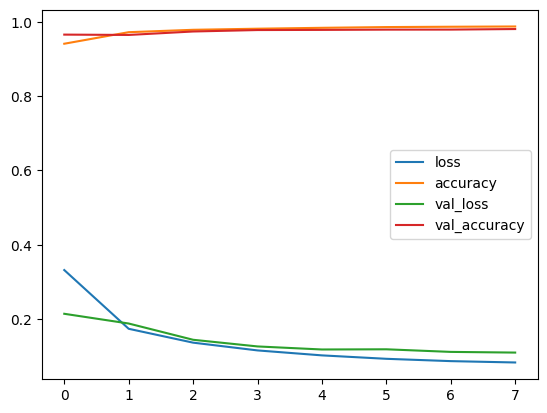

In [15]:
pd.DataFrame(history.history).plot()

In [16]:
dnn_model.evaluate(x_test_tensor_rescaled, y_test_tensor)

313/313 [==============================] - 0s 894us/step - loss: 0.1097 - accuracy: 0.9808


[0.10969511419534683, 0.9807999730110168]

In [17]:
from sklearn.metrics import confusion_matrix
preds = dnn_model.predict(x_test_tensor_rescaled)
cm = confusion_matrix(y_test_tensor, preds.argmax(axis=-1))

313/313 [==============================] - 0s 597us/step


In [18]:
cm

array([[ 970,    0,    0,    0,    1,    2,    2,    0,    2,    3],
       [   0, 1129,    0,    1,    0,    1,    0,    1,    3,    0],
       [   3,    1, 1008,    6,    0,    1,    2,    3,    8,    0],
       [   0,    0,    2,  979,    0,   21,    0,    3,    3,    2],
       [   2,    1,    1,    0,  962,    1,    7,    1,    0,    7],
       [   2,    0,    0,    2,    1,  882,    1,    1,    2,    1],
       [   2,    3,    0,    0,    7,    9,  935,    0,    2,    0],
       [   0,    5,    6,    1,    1,    0,    0, 1007,    1,    7],
       [   1,    0,    0,    1,    2,    4,    1,    4,  959,    2],
       [   2,    1,    1,    0,   11,   10,    0,    2,    5,  977]])

In [19]:
cm_df = pd.DataFrame(data=cm)

In [20]:
cm_df

,0,1,2,3,4,5,6,7,8,9
0,970,0,0,0,1,2,2,0,2,3
1,0,1129,0,1,0,1,0,1,3,0
2,3,1,1008,6,0,1,2,3,8,0
3,0,0,2,979,0,21,0,3,3,2
4,2,1,1,0,962,1,7,1,0,7
5,2,0,0,2,1,882,1,1,2,1
6,2,3,0,0,7,9,935,0,2,0
7,0,5,6,1,1,0,0,1007,1,7
8,1,0,0,1,2,4,1,4,959,2
9,2,1,1,0,11,10,0,2,5,977


<Axes: >

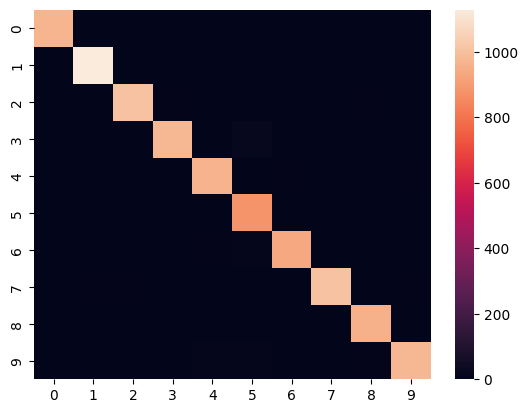

In [21]:
sns.heatmap(cm_df, cmap="rocket", xticklabels=range(0,10), yticklabels=range(0,10))